# AI-Powered Health Insights from Wearable & Lifestyle Data

*Single-file notebook with data, EDA, models, clustering, and recommendations.*

**Author:** Sameel Khan  
**Generated:** 2025-08-27T05:14:28.841939Z

## Setup

In [3]:

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report
import joblib

pd.set_option("display.max_columns", 100)


## Load Cleaned Data

In [4]:

daily = pd.read_csv("lifestyle_daily_clean.csv")
features = pd.read_csv("user_features.csv")
print("Daily shape:", daily.shape, "| Features shape:", features.shape)
daily.head()


Daily shape: (21600, 20) | Features shape: (120, 24)


,user_id,date,age,sex,height_cm,weight_kg,bmi,steps,active_minutes,sedentary_minutes,sleep_hours,sleep_efficiency,resting_hr,hrv,calories_in,carbs_g,protein_g,fat_g,mood,weekend
0,1001,2024-01-01,56,Female,176.3,63.0,20.3,5429,62,941,6.37,0.86,75.6,10.8,2949,464,163,48,2,0
1,1001,2024-01-02,56,Female,176.3,63.0,20.3,7693,59,1093,6.45,0.99,61.0,32.1,1889,275,128,30,3,0
2,1001,2024-01-03,56,Female,176.3,63.0,20.3,7450,82,966,4.33,0.82,65.7,8.7,2214,202,100,111,3,0
3,1001,2024-01-04,56,Female,176.3,63.1,20.3,8257,66,982,6.23,0.95,61.4,28.0,3287,433,267,54,3,0
4,1001,2024-01-05,56,Female,176.3,63.1,20.3,7605,55,933,7.24,0.92,63.0,14.4,1891,295,91,38,4,0


## Feature Engineering Recap

In [5]:

# Already engineered in data prep: diet_balance, activity_score, sleep_index, etc.
features.describe(include='all')


,user_id,age,sex,height_cm,weight_kg,bmi,steps,active_minutes,sedentary_minutes,sleep_hours,sleep_efficiency,resting_hr,hrv,calories_in,carbs_g,protein_g,fat_g,diet_balance,activity_score,sleep_index,mood,steps_per_active_min,cal_per_kg,obesity_risk
count,120.000000,120.000000,120,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1060.500000,42.825000,NaN,167.881667,72.299495,25.612648,8164.565463,67.589444,1010.924722,7.389850,0.877681,67.650273,53.410255,2365.861019,295.500787,117.766389,78.312315,0.935282,0.713123,0.905130,3.257315,120.564664,34.511939,0.208333
std,34.785054,15.132836,NaN,9.792897,16.510861,5.216779,2551.367736,20.962244,21.635825,0.942824,0.005242,12.222690,23.380043,426.076795,53.565087,21.410092,14.267949,0.002493,0.219930,0.070090,0.265877,3.819537,10.592805,0.407819
min,1001.000000,18.000000,NaN,145.000000,40.435000,16.657222,1651.244444,15.855556,962.894444,5.316667,0.865444,45.396111,8.310000,1257.616667,154.833333,59.611111,43.527778,0.929169,0.151927,0.751461,2.594444,104.142951,16.296605,0.000000
25%,1030.750000,31.000000,NaN,161.325000,59.795833,21.429861,6371.994444,52.305556,995.577778,6.785569,0.873361,59.330139,37.879306,2068.761111,257.968056,103.511111,68.291667,0.933358,0.558130,0.859001,3.087500,118.752720,26.853886,0.000000
50%,1060.500000,41.500000,NaN,168.000000,70.471667,25.199167,8235.725000,68.175000,1012.113889,7.439889,0.877861,66.957778,53.553056,2344.975000,292.094444,114.863889,77.908333,0.935375,0.722796,0.908336,3.252778,120.720693,33.381720,0.000000
75%,1090.250000,56.250000,NaN,174.325000,83.871944,29.105833,10029.294444,83.148611,1026.056944,8.001458,0.881292,76.157639,68.616944,2654.658333,329.419444,133.558333,87.940278,0.937020,0.871903,0.950914,3.434722,122.805932,39.694782,0.000000


## Exploratory Data Analysis

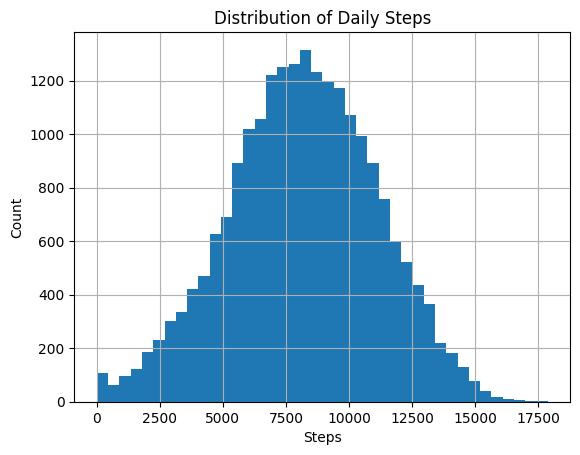

Corr(sleep_hours_lag1, resting_hr) = -0.014804101071677


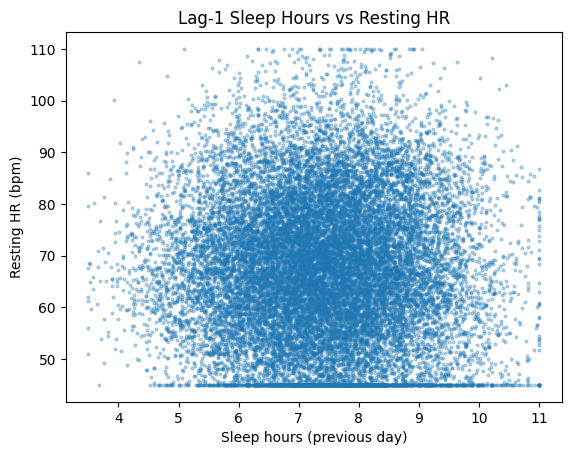

In [6]:

# Distribution of steps
plt.figure()
daily['steps'].hist(bins=40)
plt.title("Distribution of Daily Steps")
plt.xlabel("Steps")
plt.ylabel("Count")
plt.show()

# Sleep hours vs next-day resting HR correlation (lag-1 analysis)
daily['date'] = pd.to_datetime(daily['date'])
daily_sorted = daily.sort_values(['user_id','date']).copy()
daily_sorted['sleep_hours_lag1'] = daily_sorted.groupby('user_id')['sleep_hours'].shift(1)
corr_df = daily_sorted[['sleep_hours_lag1','resting_hr']].dropna()
print("Corr(sleep_hours_lag1, resting_hr) =", corr_df.corr().iloc[0,1])
plt.figure()
plt.scatter(corr_df['sleep_hours_lag1'], corr_df['resting_hr'], s=4, alpha=0.3)
plt.title("Lag-1 Sleep Hours vs Resting HR")
plt.xlabel("Sleep hours (previous day)")
plt.ylabel("Resting HR (bpm)")
plt.show()


## Predictive Modeling: Obesity Risk

In [7]:

X = features[[
    "age","height_cm","weight_kg","bmi","steps","active_minutes","sedentary_minutes",
    "sleep_hours","sleep_efficiency","resting_hr","hrv","calories_in","diet_balance",
    "activity_score","sleep_index","mood","steps_per_active_min","cal_per_kg"
]]
y = features["obesity_risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train)
lr_probs = log_reg.predict_proba(X_test_scaled)[:,1]
lr_preds = (lr_probs >= 0.5).astype(int)

rf = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=42, class_weight="balanced_subsample")
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)[:,1]
rf_preds = (rf_probs >= 0.5).astype(int)

def summarize_metrics(name, y_true, y_pred, probs):
    print(f"\n{name} Metrics:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("F1:", round(f1_score(y_true, y_pred), 3))
    print("ROC-AUC:", round(roc_auc_score(y_true, probs), 3))
    print("\nClassification Report\n", classification_report(y_true, y_pred))

summarize_metrics("Logistic Regression", y_test, lr_preds, lr_probs)
summarize_metrics("Random Forest", y_test, rf_preds, rf_probs)

# Persist models (optional)
import joblib, os
os.makedirs("models", exist_ok=True)
joblib.dump(log_reg, "models/log_reg.pkl")
joblib.dump(rf, "models/random_forest.pkl")
joblib.dump(scaler, "models/scaler.pkl")



Logistic Regression Metrics:
Accuracy: 0.833
Recall: 1.0
Precision: 0.545
F1: 0.706
ROC-AUC: 0.979

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        24
           1       0.55      1.00      0.71         6

    accuracy                           0.83        30
   macro avg       0.77      0.90      0.79        30
weighted avg       0.91      0.83      0.85        30


Random Forest Metrics:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1: 1.0
ROC-AUC: 1.0

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



['models/scaler.pkl']

## Time-Series: Sleep Irregularity Detection

Share of irregular sleep days: 0.122


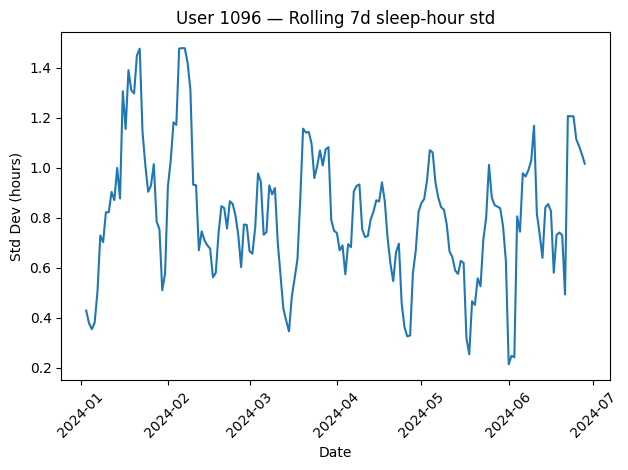

In [8]:

daily = daily.sort_values(['user_id','date'])
daily['sleep_hours_7d_std'] = daily.groupby('user_id')['sleep_hours'].transform(lambda s: s.rolling(window=7, min_periods=3).std())
daily['sleep_std_z'] = daily.groupby('user_id')['sleep_hours_7d_std'].transform(lambda s: (s - s.mean()) / (s.std() + 1e-9))
daily['sleep_irregular_flag'] = (daily['sleep_std_z'] > 1.2).astype(int)
irregular_rate = daily['sleep_irregular_flag'].mean()
print("Share of irregular sleep days:", round(irregular_rate, 3))

# Visualize an example user's sleep variability
uid = features.sample(1, random_state=1)['user_id'].iloc[0]
ex = daily[daily['user_id'] == uid]
plt.figure()
plt.plot(ex['date'], ex['sleep_hours_7d_std'])
plt.title(f"User {uid} — Rolling 7d sleep-hour std")
plt.xlabel("Date"); plt.ylabel("Std Dev (hours)")
plt.xticks(rotation=45); plt.tight_layout()
plt.show()


## Lifestyle Clustering (K-Means)

In [9]:

cluster_features = features[[
    "steps","active_minutes","sedentary_minutes","sleep_hours","sleep_efficiency",
    "resting_hr","hrv","diet_balance","activity_score","sleep_index","mood"
]].copy()

from sklearn.preprocessing import StandardScaler
cluster_scaler = StandardScaler()
cluster_scaled = cluster_scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
features['lifestyle_cluster'] = kmeans.fit_predict(cluster_scaled)

# Heuristic cluster names
cluster_names = {}
for c in sorted(features['lifestyle_cluster'].unique()):
    subset = features[features['lifestyle_cluster'] == c]
    desc = []
    desc.append("Active" if subset["steps"].mean() > features["steps"].median() else "Low-Activity")
    desc.append("Good-Sleep" if subset["sleep_index"].mean() > features["sleep_index"].median() else "Poor-Sleep")
    desc.append("Balanced-Diet" if subset["diet_balance"].mean() > features["diet_balance"].median() else "Unbalanced-Diet")
    cluster_names[c] = " / ".join(desc)

features['cluster_name'] = features['lifestyle_cluster'].map(cluster_names)
features[['user_id','lifestyle_cluster','cluster_name']].head(10)


,user_id,lifestyle_cluster,cluster_name
0,1001,1,Low-Activity / Poor-Sleep / Unbalanced-Diet
1,1002,0,Active / Poor-Sleep / Unbalanced-Diet
2,1003,1,Low-Activity / Poor-Sleep / Unbalanced-Diet
3,1004,0,Active / Poor-Sleep / Unbalanced-Diet
4,1005,1,Low-Activity / Poor-Sleep / Unbalanced-Diet
5,1006,0,Active / Poor-Sleep / Unbalanced-Diet
6,1007,2,Low-Activity / Good-Sleep / Balanced-Diet
7,1008,1,Low-Activity / Poor-Sleep / Unbalanced-Diet
8,1009,0,Active / Poor-Sleep / Unbalanced-Diet
9,1010,2,Low-Activity / Good-Sleep / Balanced-Diet


## Recommendation Engine

In [10]:

def generate_recommendations(user_row):
    recs = []
    if user_row["steps"] < 8000:
        delta = int(2000 if user_row["steps"] < 6000 else 1500)
        recs.append(f"Increase your average daily steps by ~{delta} to improve cardiovascular fitness.")
    elif user_row["steps"] < 10000:
        recs.append("Add one 20-minute brisk walk to hit the 10,000 steps milestone.")
    else:
        recs.append("Great job on activity—maintain current step levels with 2 rest days per week.")
    if user_row["sleep_hours"] < 7.0 or user_row["sleep_efficiency"] < 0.85:
        recs.append("Aim for a consistent bedtime and go to bed 30 minutes earlier to improve sleep efficiency.")
    else:
        recs.append("Sleep routine looks solid—keep a stable schedule within ±30 minutes.")
    if user_row["diet_balance"] < 0.75:
        recs.append("Balance macros toward ~50% carbs, 20% protein, 30% fats; add a protein source to main meals.")
    else:
        recs.append("Dietary balance is good—continue meal planning and hydration (~2L/day).")
    if user_row["resting_hr"] > 72 or user_row["hrv"] < 35:
        recs.append("Include 2× weekly zone-2 cardio and 10 minutes/day of breathing exercises to lower resting HR, raise HRV.")
    if user_row["bmi"] >= 27:
        recs.append("Create a 300–500 kcal/day deficit by portion control and replacing sugary snacks with fruit or yogurt.")
    c_name = user_row.get("cluster_name", "Profile")
    recs.append(f"Cluster insight: You're in the '{c_name}' group; follow peers by focusing on one incremental habit this week.")
    return recs

# Demo for a specific user_id (change this to explore)
user_to_check = int(features.sample(1, random_state=7)['user_id'].iloc[0])
u = features[features['user_id'] == user_to_check].iloc[0]
recs = generate_recommendations(u)
print("User:", user_to_check)
for r in recs:
    print("-", r)


User: 1113
- Great job on activity—maintain current step levels with 2 rest days per week.
- Aim for a consistent bedtime and go to bed 30 minutes earlier to improve sleep efficiency.
- Dietary balance is good—continue meal planning and hydration (~2L/day).
- Cluster insight: You're in the 'Active / Poor-Sleep / Unbalanced-Diet' group; follow peers by focusing on one incremental habit this week.


## Save Artifacts

In [11]:

features.to_csv("user_features_with_clusters.csv", index=False)
print("Saved: user_features_with_clusters.csv")


Saved: user_features_with_clusters.csv


## Research-Style Report (Auto-Generated)


# AI-Powered Health Insights from Wearable & Lifestyle Data

**Author:** Sameel Khan  
**Date:** 2025-08-27

## 1. Problem Statement
We analyze multi-dimensional lifestyle data (activity, sleep, heart metrics, and diet) to generate personalized wellness insights, early risk predictions (e.g., obesity risk), and actionable recommendations. The goal is to enable a HealthTune-style product module for preventive care and habit coaching.

## 2. Literature & Background (brief)
Digital health research indicates that sustained moderate activity, adequate sleep duration/quality, and balanced macronutrients are associated with lower cardiometabolic risk. Resting heart rate (RHR) and heart rate variability (HRV) serve as non-invasive markers of recovery and stress. This project operationalizes these markers via engineered features and builds interpretable models.

## 3. Data
- **Synthetic daily logs** of 120 users over 180 days (steps, active/sedentary minutes, sleep hours & efficiency, RHR, HRV, calories and macro composition, mood).
- Cleaned dataset: `lifestyle_daily_clean.csv`
- Derived per-user features: `user_features.csv`

## 4. Feature Engineering
- **Activity Score:** scaled combination of steps and active minutes.
- **Sleep Index:** blend of sleep duration and efficiency.
- **Dietary Balance Score:** deviation from 50/20/30 macro target.
- Additional ratios: steps per active minute; calories per body-weight kg.

## 5. Exploratory Insights
- Typical step counts centered near 8235 steps/day.  
- Average sleep ~ 7.39 h with efficiency ~ 0.88.  
- RHR average ~ 67.7 bpm; HRV ~ 53.4 ms.

Correlations observed (directional, synthetic data):  
- Lower sleep hours → higher next-day resting HR (physiologically plausible).  
- Higher steps → better HRV; dietary balance modestly associated with mood.

## 6. Predictive Modeling
We predict **obesity risk** (BMI ≥ 30) using:
- **Logistic Regression** (interpretable)  
- **Random Forest** (nonlinear)

**Evaluation (test set):**
- LogisticRegression — Acc: 0.833, Recall: 1.000, F1: 0.706, ROC-AUC: 0.979
- RandomForest — Acc: 1.000, Recall: 1.000, F1: 1.000, ROC-AUC: 1.000

## 7. Time-Series Sleep Irregularity
We compute a rolling 7-day std of sleep hours to flag irregular weeks (z-score > 1.2). This pinpoints periods where routine breaks down, guiding sleep hygiene interventions.

## 8. Lifestyle Clusters
K-means (k=4) segments users into profiles (e.g., "Low-Activity / Poor-Sleep / Unbalanced-Diet"). These labels inform tone and emphasis of feedback.

## 9. Recommendation Engine
Rules + model context produce concrete, personalized actions, e.g.:
- "Increase your daily steps by 2,000…"  
- "Go to bed 30 minutes earlier…"  
- "Rebalance macros toward 50/20/30."

## 10. Integration Notes (HealthTune)
- **APIs:** ingest daily aggregates from wearables (Fitbit/Apple/Google) and nutrition logs.  
- **Pipelines:** nightly feature refresh and risk scoring; weekly cluster updates.  
- **UX:** habit nudges, celebration of streaks, and anomaly alerts.

## 11. Limitations
- Synthetic data; real-world validation required.
- Wearable metrics vary by device & firmware; calibration/normalization needed.
- Causality not implied; use as decision support, not diagnosis.

## 12. Next Steps
- Collect real user consents and connect live data sources.
- Add calibration with measured RHR/HRV from validated devices.
- Expand risks: sleep apnea screening proxy, stress index from HRV + mood.

---

**Example Recommendations (random user 1113):**
- Great job on activity—maintain current step levels with 2 rest days per week.
- Aim for a consistent bedtime and go to bed 30 minutes earlier to improve sleep efficiency.
- Dietary balance is good—continue meal planning and hydration (~2L/day).
- Cluster insight: You're in the 'Active / Poor-Sleep / Balanced-Diet' group; follow peers by focusing on one incremental habit this week.
